In [302]:
import pandas as pd
from matplotlib import pyplot as plt

In [303]:
immo_dataset = pd.read_csv('fulldata.csv')

immo_dataset.head(15)


,locality,postal_code,region,property_type,subtype_property,price,contruction_year,type_of_sale,number_of_rooms,living_area,...,has_open_fire,has_terrace,terrace_area,has_garden,garden_surface,habitable_surface,plot_land_surface,number_of_facades,has_swimming_pool,building_state
0,Deinze,9800,Flanders,APARTMENT,APARTMENT,395000.0,2023.0,residential_sale,2,22.0,...,0,1,12.0,1,NaN,99.0,NaN,4.0,0,AS_NEW
1,Halle,1500,Flanders,HOUSE,HOUSE,385000.0,NaN,residential_sale,3,NaN,...,0,0,NaN,0,NaN,158.0,NaN,NaN,0,NaN
2,Antwerp,2060,Flanders,APARTMENT,APARTMENT,140000.0,NaN,residential_sale,1,NaN,...,0,1,8.0,0,NaN,44.0,NaN,NaN,0,NaN
3,Antwerp,2018,Flanders,APARTMENT,APARTMENT,215000.0,NaN,residential_sale,2,NaN,...,0,0,NaN,0,NaN,75.0,NaN,NaN,0,NaN
4,Edegem,2650,Flanders,APARTMENT,APARTMENT,349900.0,NaN,residential_sale,2,NaN,...,0,1,NaN,0,NaN,103.0,NaN,NaN,0,NaN
5,Tremelo,3128,Flanders,HOUSE,HOUSE,380000.0,1993.0,residential_sale,4,40.0,...,0,1,NaN,0,NaN,220.0,863.0,4.0,0,TO_RENOVATE
6,Tielt-Winge,3390,Flanders,HOUSE,HOUSE,510000.0,2024.0,residential_sale,5,30.0,...,0,1,NaN,0,NaN,224.0,693.0,3.0,0,AS_NEW
7,Denderleeuw,9470,Flanders,HOUSE,HOUSE,339000.0,NaN,residential_sale,3,NaN,...,0,1,NaN,0,NaN,165.0,NaN,NaN,0,NaN
8,Knokke,8300,Flanders,APARTMENT,APARTMENT,765000.0,NaN,residential_sale,2,NaN,...,0,1,10.0,0,NaN,96.0,NaN,NaN,0,NaN
9,Molenbeek-Saint-Jean,1080,Brussels,APARTMENT,APARTMENT,339000.0,NaN,residential_sale,3,NaN,...,1,0,NaN,0,NaN,140.0,NaN,NaN,0,NaN


In [304]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11243 entries, 0 to 11242
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   locality               11243 non-null  object 
 1   postal_code            11243 non-null  object 
 2   region                 11171 non-null  object 
 3   property_type          11243 non-null  object 
 4   subtype_property       11243 non-null  object 
 5   price                  11242 non-null  float64
 6   contruction_year       2406 non-null   float64
 7   type_of_sale           11243 non-null  object 
 8   number_of_rooms        11243 non-null  int64  
 9   living_area            3438 non-null   float64
 10  kitchen_fully_equiped  3438 non-null   float64
 11  is_furnished           11243 non-null  int64  
 12  has_open_fire          11243 non-null  int64  
 13  has_terrace            11243 non-null  int64  
 14  terrace_area           4678 non-null   float64
 15  ha

Data Cleaning

Fill empty values

In [305]:
#immo_dataset_replace_y_n = immo_dataset.replace({'Yes': 1, 'No': 0}) 
#immo_dataset_replace_y_n.head(10)


In [306]:
immo_dataset[['contruction_year', 'building_state']].to_csv('test3.csv')


In [307]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

locality                  0.000000
postal_code               0.000000
region                    0.640398
property_type             0.000000
subtype_property          0.000000
price                     0.008894
contruction_year         78.600018
type_of_sale              0.000000
number_of_rooms           0.000000
living_area              69.420973
kitchen_fully_equiped    69.420973
is_furnished              0.000000
has_open_fire             0.000000
has_terrace               0.000000
terrace_area             58.391888
has_garden                0.000000
garden_surface           78.004091
habitable_surface         5.398915
plot_land_surface        75.673753
number_of_facades        73.974918
has_swimming_pool         0.000000
building_state           73.049898
dtype: float64


Replace space in postal_code

In [308]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace(' ', '')

In [309]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('MK', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('AN', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('KA', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('AG', '')

We dropped columns from main data because it had hight % of missing values.

In [310]:
drop_columns = ['locality', 'contruction_year', 'living_area', 'kitchen_fully_equiped', 'terrace_area', 'garden_surface', 'plot_land_surface', 'number_of_facades', 'building_state']
immo_dataset.drop(drop_columns , axis=1, inplace=True)
immo_dataset.head(10)


,postal_code,region,property_type,subtype_property,price,type_of_sale,number_of_rooms,is_furnished,has_open_fire,has_terrace,has_garden,habitable_surface,has_swimming_pool
0,9800,Flanders,APARTMENT,APARTMENT,395000.0,residential_sale,2,0,0,1,1,99.0,0
1,1500,Flanders,HOUSE,HOUSE,385000.0,residential_sale,3,0,0,0,0,158.0,0
2,2060,Flanders,APARTMENT,APARTMENT,140000.0,residential_sale,1,0,0,1,0,44.0,0
3,2018,Flanders,APARTMENT,APARTMENT,215000.0,residential_sale,2,0,0,0,0,75.0,0
4,2650,Flanders,APARTMENT,APARTMENT,349900.0,residential_sale,2,0,0,1,0,103.0,0
5,3128,Flanders,HOUSE,HOUSE,380000.0,residential_sale,4,0,0,1,0,220.0,0
6,3390,Flanders,HOUSE,HOUSE,510000.0,residential_sale,5,0,0,1,0,224.0,0
7,9470,Flanders,HOUSE,HOUSE,339000.0,residential_sale,3,0,0,1,0,165.0,0
8,8300,Flanders,APARTMENT,APARTMENT,765000.0,residential_sale,2,1,0,1,0,96.0,0
9,1080,Brussels,APARTMENT,APARTMENT,339000.0,residential_sale,3,0,1,0,0,140.0,0


In [311]:
duplicate_rows = immo_dataset.duplicated()
duplicate_data = immo_dataset[duplicate_rows]

print(duplicate_data)

      postal_code    region property_type subtype_property      price   
191          2830  Flanders     APARTMENT        APARTMENT   225000.0  \
218          4820  Wallonie     APARTMENT        APARTMENT    99000.0   
255          1300  Wallonie     APARTMENT        APARTMENT   299000.0   
315          4101  Wallonie         HOUSE            HOUSE   239500.0   
479          1180  Brussels     APARTMENT        APARTMENT   245000.0   
...           ...       ...           ...              ...        ...   
11125        6120  Wallonie         HOUSE            HOUSE   374000.0   
11133        9060  Flanders     APARTMENT        APARTMENT   149000.0   
11172        9500  Flanders         HOUSE            HOUSE   125000.0   
11194        1180  Brussels         HOUSE            HOUSE  1450000.0   
11212        1070  Brussels         HOUSE            HOUSE   749000.0   

           type_of_sale  number_of_rooms  is_furnished  has_open_fire   
191    residential_sale                3          

In [312]:
immo_dataset = immo_dataset.reset_index(drop=True)

In [313]:
immo_dataset.drop_duplicates(inplace=True)
immo_dataset.to_csv('immo_clean1.csv')

In [314]:
immo_dataset = immo_dataset.reset_index()

In [315]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              10945 non-null  int64  
 1   postal_code        10945 non-null  object 
 2   region             10873 non-null  object 
 3   property_type      10945 non-null  object 
 4   subtype_property   10945 non-null  object 
 5   price              10944 non-null  float64
 6   type_of_sale       10945 non-null  object 
 7   number_of_rooms    10945 non-null  int64  
 8   is_furnished       10945 non-null  int64  
 9   has_open_fire      10945 non-null  int64  
 10  has_terrace        10945 non-null  int64  
 11  has_garden         10945 non-null  int64  
 12  habitable_surface  10351 non-null  float64
 13  has_swimming_pool  10945 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 1.2+ MB


In [316]:
#remove space from all columns
immo_dataset_space_removed = immo_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print(immo_dataset_space_removed)

       index postal_code    region property_type subtype_property     price   
0          0        9800  Flanders     APARTMENT        APARTMENT  395000.0  \
1          1        1500  Flanders         HOUSE            HOUSE  385000.0   
2          2        2060  Flanders     APARTMENT        APARTMENT  140000.0   
3          3        2018  Flanders     APARTMENT        APARTMENT  215000.0   
4          4        2650  Flanders     APARTMENT        APARTMENT  349900.0   
...      ...         ...       ...           ...              ...       ...   
10940  11238        2830  Flanders     APARTMENT        APARTMENT  289000.0   
10941  11239        2830  Flanders     APARTMENT        APARTMENT  291000.0   
10942  11240        2830  Flanders     APARTMENT        APARTMENT  281000.0   
10943  11241        2990  Flanders         HOUSE            HOUSE  225000.0   
10944  11242        2830  Flanders     APARTMENT        APARTMENT  309000.0   

           type_of_sale  number_of_rooms  is_furnis

In [317]:
#Find empty values
empty_values = immo_dataset.isna()

#Count the number of empty values in each column
empty_count = empty_values.sum()

#Display the columns with empty values
print("Columns with empty values:")
print(empty_count[empty_count > 0])

Columns with empty values:
region                72
price                  1
habitable_surface    594
dtype: int64


Data Analysis

In [318]:
immo_dataset.shape

(10945, 14)

In [319]:
immo_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              10945 non-null  int64  
 1   postal_code        10945 non-null  object 
 2   region             10873 non-null  object 
 3   property_type      10945 non-null  object 
 4   subtype_property   10945 non-null  object 
 5   price              10944 non-null  float64
 6   type_of_sale       10945 non-null  object 
 7   number_of_rooms    10945 non-null  int64  
 8   is_furnished       10945 non-null  int64  
 9   has_open_fire      10945 non-null  int64  
 10  has_terrace        10945 non-null  int64  
 11  has_garden         10945 non-null  int64  
 12  habitable_surface  10351 non-null  float64
 13  has_swimming_pool  10945 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 1.2+ MB


In [320]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

index                0.000000
postal_code          0.000000
region               0.657835
property_type        0.000000
subtype_property     0.000000
price                0.009137
type_of_sale         0.000000
number_of_rooms      0.000000
is_furnished         0.000000
has_open_fire        0.000000
has_terrace          0.000000
has_garden           0.000000
habitable_surface    5.427136
has_swimming_pool    0.000000
dtype: float64


In [321]:
correlation_coefficient = immo_dataset['price'].corr(immo_dataset['habitable_surface'])
print(correlation_coefficient)

0.5269583844662233


Find correlation between price and other variables

In [322]:

# Read the dataset into a pandas DataFrame
#data = pd.read_csv("your_dataset.csv")
# Select the numeric columns for correlation analysis
numeric_columns = immo_dataset.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation using Pearson method
pearson_corr = immo_dataset[numeric_columns].corr(method='pearson')['price']

# Calculate the correlation using Spearman method
spearman_corr = immo_dataset[numeric_columns].corr(method='spearman')['price']

# Print the correlation values
print("Pearson correlation:\n", pearson_corr)
print("\nSpearman correlation:\n", spearman_corr)

Pearson correlation:
 index               -0.002547
price                1.000000
number_of_rooms      0.326859
is_furnished         0.008029
has_open_fire       -0.033339
has_terrace          0.090021
has_garden           0.056020
habitable_surface    0.526958
has_swimming_pool    0.234510
Name: price, dtype: float64

Spearman correlation:
 index               -0.009738
price                1.000000
number_of_rooms      0.461868
is_furnished        -0.012346
has_open_fire       -0.045374
has_terrace          0.128074
has_garden           0.145306
habitable_surface    0.568590
has_swimming_pool    0.141463
Name: price, dtype: float64


In [323]:
import numpy as np
numeric_columns = ['postal_code', 'price', 'number_of_rooms',
                   'is_furnished', 'has_open_fire', 'has_terrace',
                   'has_garden', 'habitable_surface', 'has_swimming_pool']

categorical_columns = ['region', 'property_type', 'subtype_property', 'type_of_sale']
# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

correlation_coefficient = encoded_data.corr()[['price']]

# Print the correlation coefficients
correlation_coefficient.to_csv('test1.csv')
print(correlation_coefficient)

                                                  price
index                                         -0.002547
postal_code                                   -0.049488
price                                          1.000000
number_of_rooms                                0.326859
is_furnished                                   0.008029
has_open_fire                                 -0.033339
has_terrace                                    0.090021
has_garden                                     0.056020
habitable_surface                              0.526958
has_swimming_pool                              0.234510
region_Brussels                                0.165630
region_Flanders                                0.026187
region_Wallonie                               -0.179780
property_type_APARTMENT                       -0.049287
property_type_HOUSE                            0.049287
subtype_property_APARTMENT                    -0.049287
subtype_property_HOUSE                         0

How are variables correlated to each other? 

In [324]:
#Select the correlation values of "price" column with other columns
price_correlation = correlation_coefficient['price'].drop('price')

Which variables have the greatest influence on the price?

Which variables have the least influence on the price?

How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

Percentage of missing values per column?

https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=6

https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/the-problem-with-missing-data?ex=5

In [325]:
missing_percentage = immo_dataset_replace_y_n.isna().mean() * 100
print(missing_percentage)

NameError: name 'immo_dataset_replace_y_n' is not defined

Step 3 : Data Interpretation

Plot the outliers.

Which variables would you delete and why ?


Represent the number of properties according to their surface using a histogram.


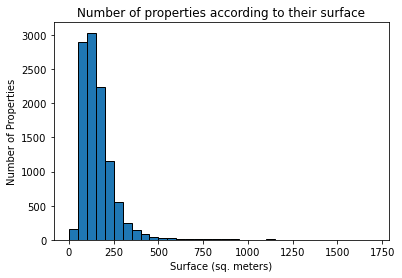

In [ ]:
# Extract the 'habitable_surface' data
surface = immo_dataset['habitable_surface']

# Determine the bin intervals
#bin_width = 50
#bins = range(0, int(max(surface)) + bin_width, bin_width)

# Create the histogram
plt.hist(surface, bins=50, edgecolor='black')

# Label the axes and add a title
plt.xlabel('Surface (sq. meters)')
plt.ylabel('Number of Properties')
plt.title('Number of properties according to their surface')

# Display the histogram
plt.show()



In your opinion, which 5 variables are the most important and why?


What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)


What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)


What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)


What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)


What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)


What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)
